In [19]:
# import necessary libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import seaborn as sns
from shapely.geometry import LineString
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors

In [20]:
# read data 
data = pd.read_parquet('../data/data_parquet/processed_data_combined.parquet')

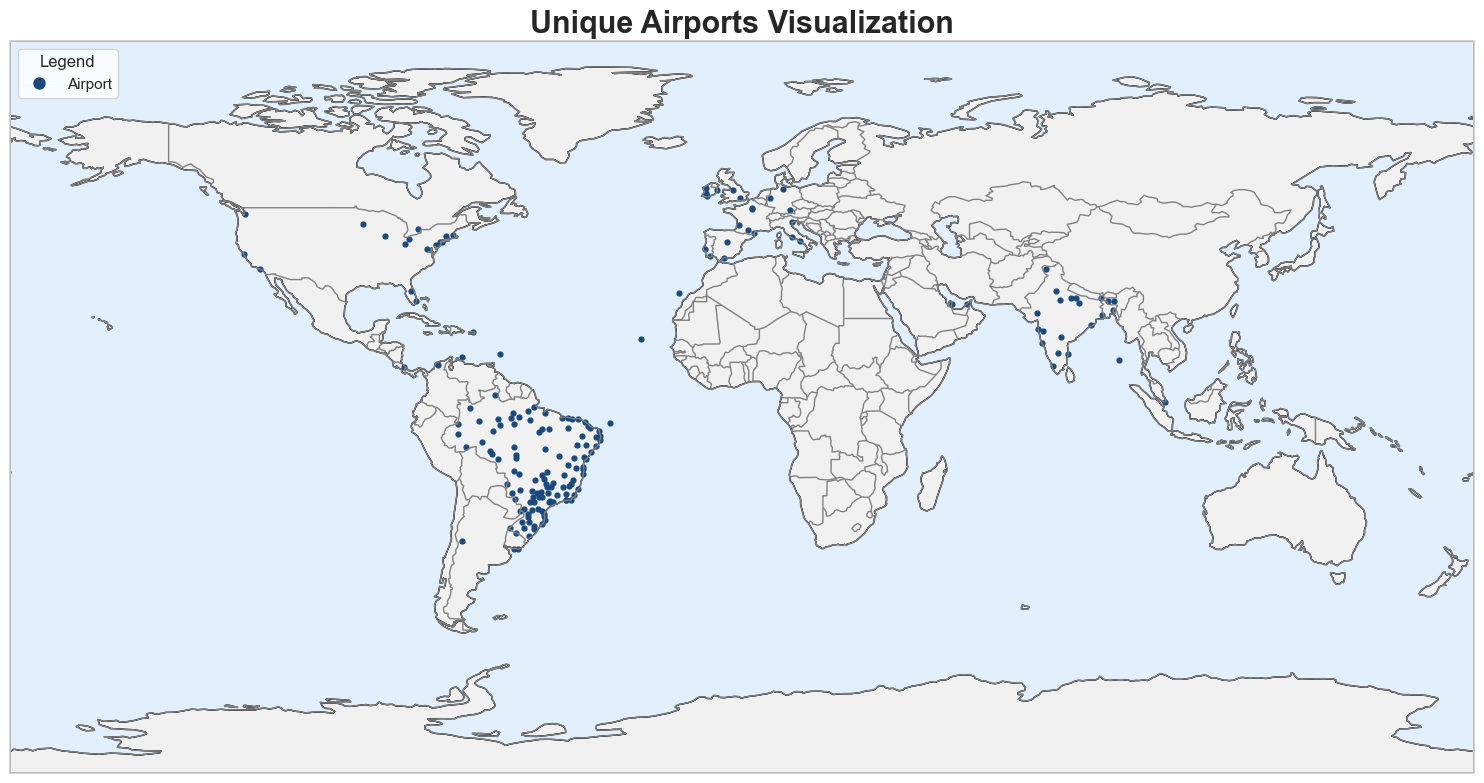

In [21]:
# extract unique airports
unique_airports = data[['departure_city', 'departure_country', 'departure_lat', 'departure_lon']].drop_duplicates()

# create a GeoDataFrame
gdf = gpd.GeoDataFrame(unique_airports, 
                       geometry=gpd.points_from_xy(unique_airports.departure_lon, unique_airports.departure_lat))

# filter out empty points
gdf = gdf[~gdf.geometry.is_empty]

# create the map
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()

# add background and physical features
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='#f0f0f0')  # light color for land masses
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='#E1EEFB')  # white for oceans
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='gray')

# add airports (only points, no labels)
ax.scatter(gdf.geometry.x, gdf.geometry.y, color='#1a497e', s=12, transform=ccrs.PlateCarree())

# add title and description
plt.title('Unique Airports Visualization', fontsize=22, fontweight='bold')

'''plt.figtext(0.5, 0.1, 'This map shows unique airports based on departure locations.\n'
                      'Each red dot represents an airport.', 
            ha='center', fontsize=12)'''

# add legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Airport', markerfacecolor='#1a497e', markersize=10)]
ax.legend(handles=legend_elements, loc='upper left', title='Legend')

# adjust layout
plt.tight_layout()

# save the figure as SVG
plt.savefig('./graphics/unique_airports.svg', format='svg')

# show the plot
plt.show()

In [22]:
# count the number of flights departing from each airport
departure_flight_counts = data.groupby(['departure_airport', 'departure_city', 'departure_country', 'departure_lat', 'departure_lon']).flight_id.nunique().reset_index()
departure_flight_counts.columns = ['departure_airport', 'departure_city', 'departure_country', 'departure_lat', 'departure_lon', 'num_flights']

departure_flight_counts

,departure_airport,departure_city,departure_country,departure_lat,departure_lon,num_flights
0,AAX,Araxa,BR,-19.56320,-46.96040,10
1,AFL,Alta Floresta,BR,-9.86639,-56.10500,12
2,AGP,Malaga,ES,36.67490,-4.49911,18
3,AJU,Aracaju,BR,-10.98400,-37.07030,100
4,AMD,Ahmedabad,IN,23.07720,72.63470,220
...,...,...,...,...,...,...
179,VDC,Vitória da Conquista,BR,-14.90783,-40.91467,23
180,VIX,Vitoria,BR,-20.25806,-40.28639,167
181,VNS,Varanasi,IN,25.45117,82.85867,81
182,XAP,Chapeco,BR,-27.13420,-52.65660,52


In [23]:
# count the number of flights arriving at each airport
arrival_flight_counts = data.groupby(['arrival_airport', 'arrival_city', 'arrival_country', 'arrival_lat', 'arrival_lon']).flight_id.nunique().reset_index()
arrival_flight_counts.columns = ['arrival_airport', 'arrival_city', 'arrival_country', 'arrival_lat', 'arrival_lon', 'num_flights']
arrival_flight_counts

,arrival_airport,arrival_city,arrival_country,arrival_lat,arrival_lon,num_flights
0,AAX,Araxa,BR,-19.56320,-46.96040,5
1,ACE,Lanzarote Island,ES,28.94550,-13.60520,30
2,ADB,Izmir,TR,38.29240,27.15700,10
3,AFL,Alta Floresta,BR,-9.86639,-56.10500,13
4,AGP,Malaga,ES,36.67490,-4.49911,63
...,...,...,...,...,...,...
188,VNS,Varanasi,IN,25.45117,82.85867,81
189,VRN,Verona,IT,45.39570,10.88850,8
190,XAP,Chapeco,BR,-27.13420,-52.65660,51
191,YYZ,Mississauga,CA,43.67720,-79.63060,18


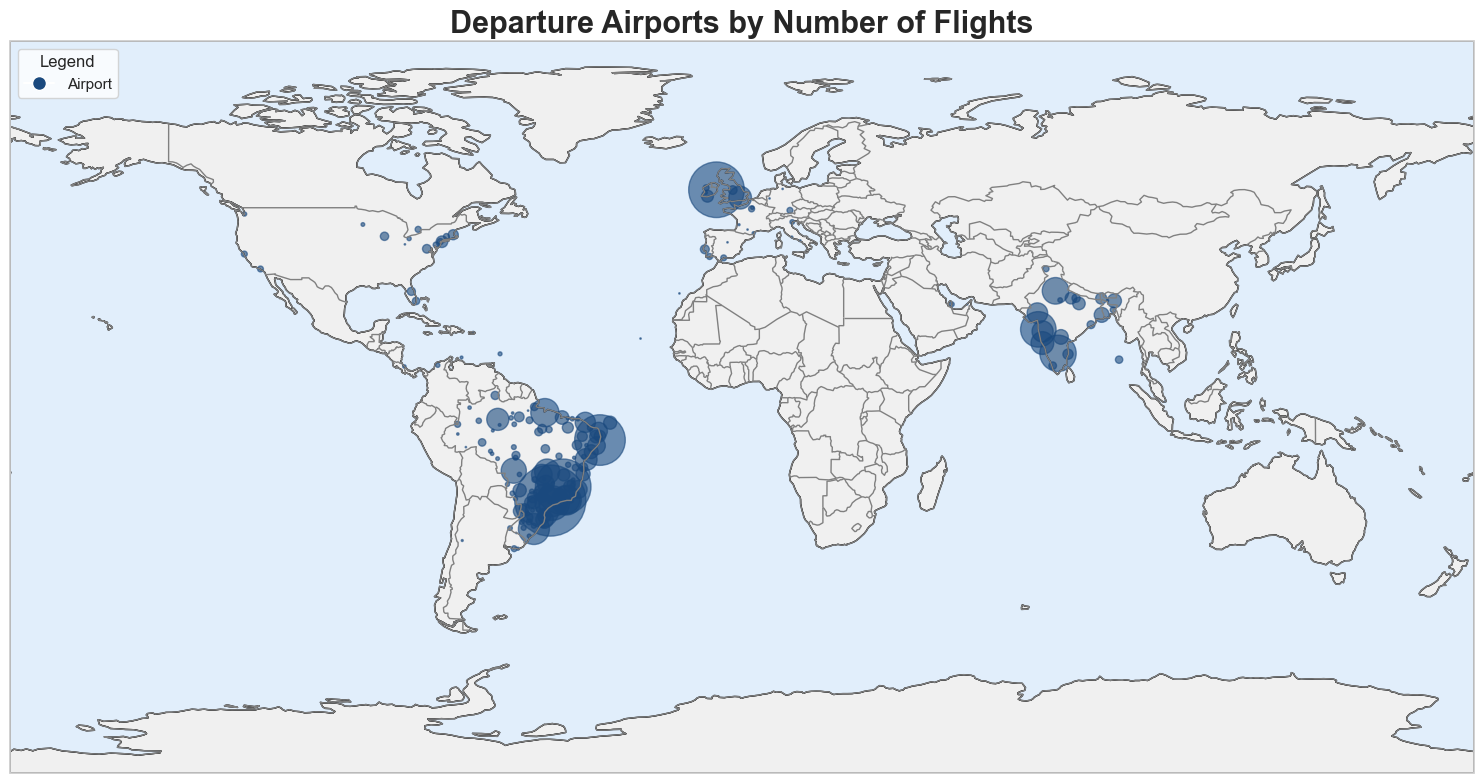

In [24]:
# GeoDataFrame
gdf = gpd.GeoDataFrame(departure_flight_counts, 
                       geometry=gpd.points_from_xy(departure_flight_counts.departure_lon, departure_flight_counts.departure_lat))

# filter out empty points
gdf = gdf[~gdf.geometry.is_empty]

# map
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()

# add background and physical features
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='#f0f0f0') 
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='#E1EEFB')  
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='gray')

# airports with size proportional to the number of flights
scatter = ax.scatter(gdf.geometry.x, gdf.geometry.y, s=gdf.num_flights, color='#1a497e', transform=ccrs.PlateCarree(), alpha=0.6)

# title and description
plt.title('Departure Airports by Number of Flights', fontsize=22, fontweight='bold')

# legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Airport', markerfacecolor='#1a497e', markersize=10)]
ax.legend(handles=legend_elements, loc='upper left', title='Legend')

# adjust layout
plt.tight_layout()
plt.savefig('./graphics/depature_airports_flights.svg', format='svg')

plt.show()



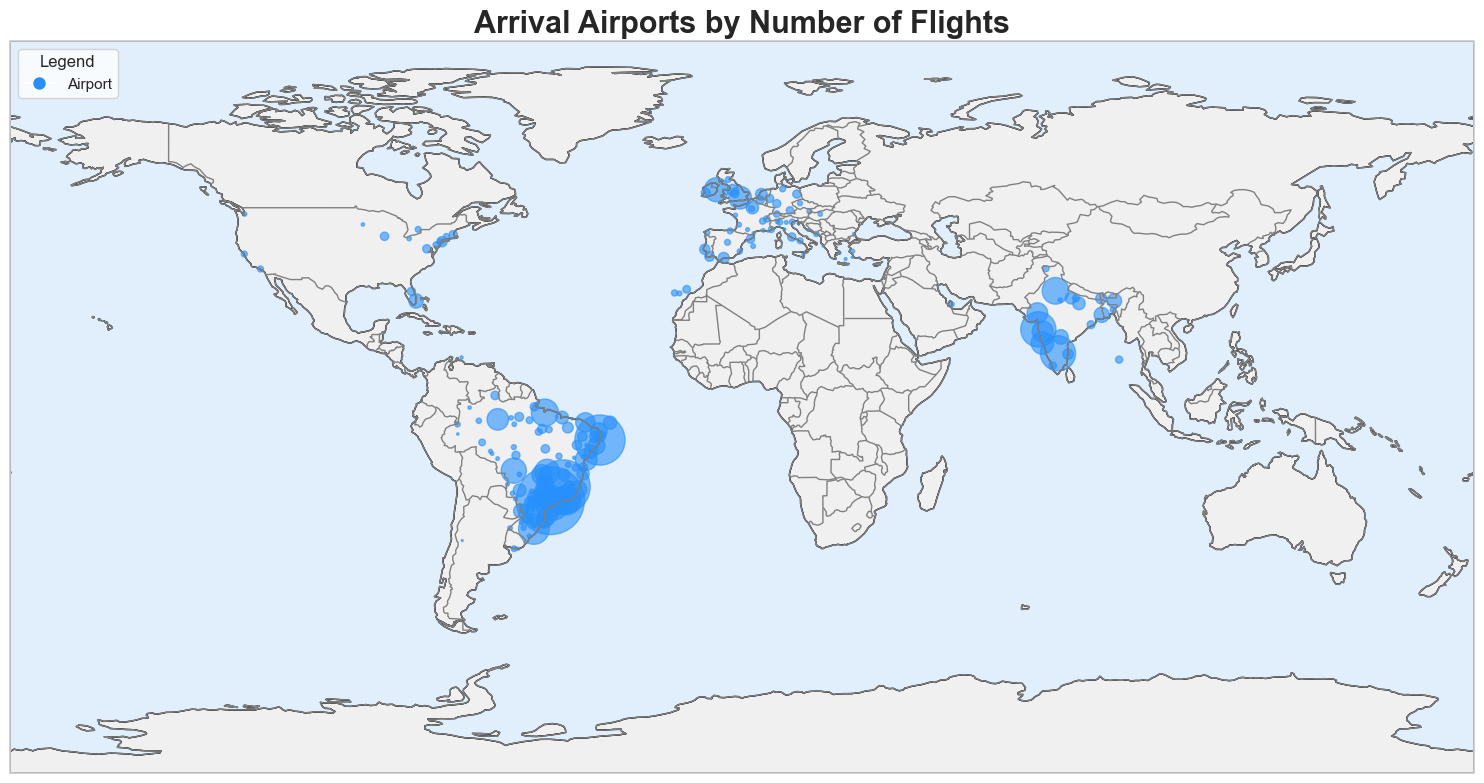

In [26]:
# a GeoDataFrame
arrival_gdf = gpd.GeoDataFrame(arrival_flight_counts, 
                               geometry=gpd.points_from_xy(arrival_flight_counts.arrival_lon, arrival_flight_counts.arrival_lat))

# filter out empty points
arrival_gdf = arrival_gdf[~arrival_gdf.geometry.is_empty]

# map
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()

# background and physical features
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='#f0f0f0')  # light color for land masses
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='#E1EEFB')  # white for oceans
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='gray')

# airports with size proportional to the number of flights in blue
scatter = ax.scatter(arrival_gdf.geometry.x, arrival_gdf.geometry.y, s=arrival_gdf.num_flights, color='#2790FD', transform=ccrs.PlateCarree(), alpha=0.6)

# title and description
plt.title('Arrival Airports by Number of Flights', fontsize=22, fontweight='bold')

# legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Airport', markerfacecolor='#2790FD', markersize=10)]
ax.legend(handles=legend_elements, loc='upper left', title='Legend')

# adjust layout 
plt.tight_layout()
plt.savefig('./graphics/arrival_airports_flights.svg', format='svg')

plt.show()



/var/folders/vm/vj250x0s5q9bj_4nnx_z8mcc0000gn/T/ipykernel_78572/2393692063.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='count', y='departure_airport', data=df_sorted, palette='Blues_r')


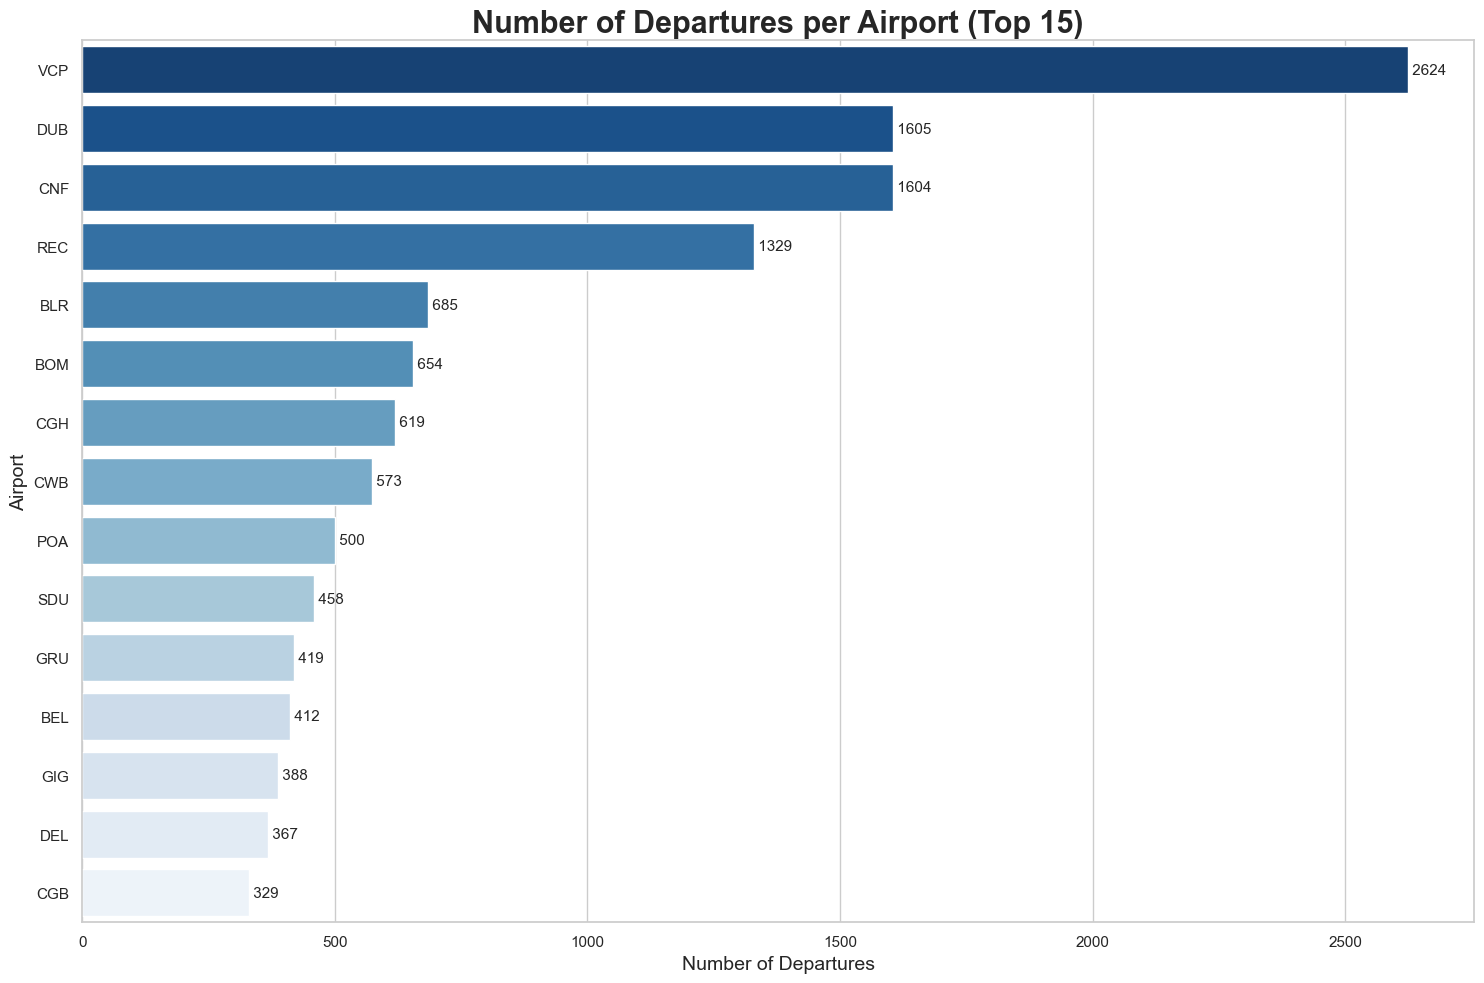

In [27]:
# number of flights departing from each airport
departure_flight_counts = data.groupby('departure_airport').flight_id.nunique().reset_index()
departure_flight_counts.columns = ['departure_airport', 'count']

# sort data by count and select top 15 airports
df_sorted = departure_flight_counts.sort_values(by='count', ascending=False).head(15)

# plot
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
barplot = sns.barplot(x='count', y='departure_airport', data=df_sorted, palette='Blues_r')

# title and labels
plt.title('Number of Departures per Airport (Top 15)', fontsize=22, fontweight  = 'bold')
plt.xlabel('Number of Departures', fontsize=14)
plt.ylabel('Airport', fontsize=14)

# number of departures next to the bars
for index, value in enumerate(df_sorted['count']):
    plt.text(value, index, f' {value}', va='center', fontsize=11)

# description below the plot
'''plt.figtext(0.5, -0.1, 'This bar chart shows the number of departures from the top 15 airports.\n'
                       'The airports are listed on the right, and the length of the bars indicates the number of departures.', 
            ha='center', fontsize=12)'''

# adjust layout 
plt.tight_layout()
plt.savefig('./graphics/top_15_airports.svg', format='svg')

plt.show()



/var/folders/vm/vj250x0s5q9bj_4nnx_z8mcc0000gn/T/ipykernel_78572/1263598861.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='count', y='route', data=top_routes, palette='Blues_r')


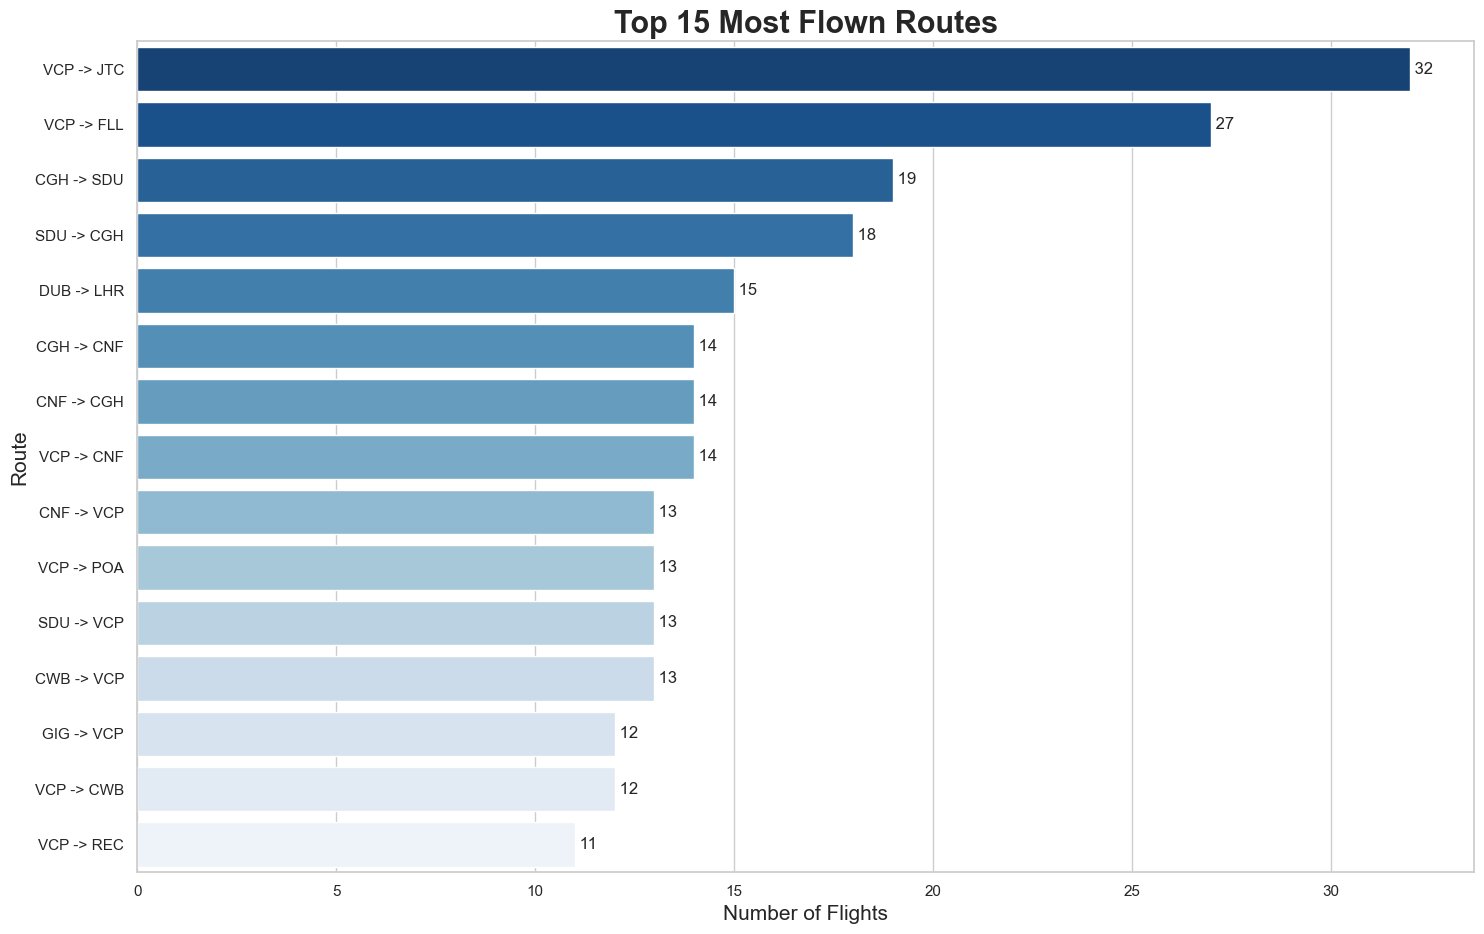

In [28]:
# new column for the route
data['route'] = data['departure_airport'] + ' -> ' + data['arrival_airport']

# drop duplicate flight numbers for each route
df_unique_flights = data.drop_duplicates(subset=['flight_number', 'route'])

# count the number of flights per route
route_counts = df_unique_flights['route'].value_counts().reset_index()
route_counts.columns = ['route', 'count']

# sort and select the top 15 routes
top_routes = route_counts.head(15)

# plot
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
barplot = sns.barplot(x='count', y='route', data=top_routes, palette='Blues_r')

# title and labels
plt.title('Top 15 Most Flown Routes', fontsize=22, fontweight = 'bold')
plt.xlabel('Number of Flights', fontsize=15)
plt.ylabel('Route', fontsize=15)

# number of flights next to the bars
for index, value in enumerate(top_routes['count']):
    plt.text(value, index, f' {value}', va='center', fontsize=12)

# description below the plot
"""plt.figtext(0.5, -0.1, 'This bar chart shows the number of flights for the top 15 most flown routes.\n'
                       'The routes are listed on the right, and the length of the bars indicates the number of flights.', 
            ha='center', fontsize=12)"""



# adjust layout
plt.tight_layout(rect=[0, 0.05, 1, 1])

plt.savefig('./graphics/top_15_routes.svg', format='svg')

plt.show()



In [29]:
# total number of unique routes
total_routes = route_counts.shape[0]

print(f"Total number of unique routes: {total_routes}")

Total number of unique routes: 704


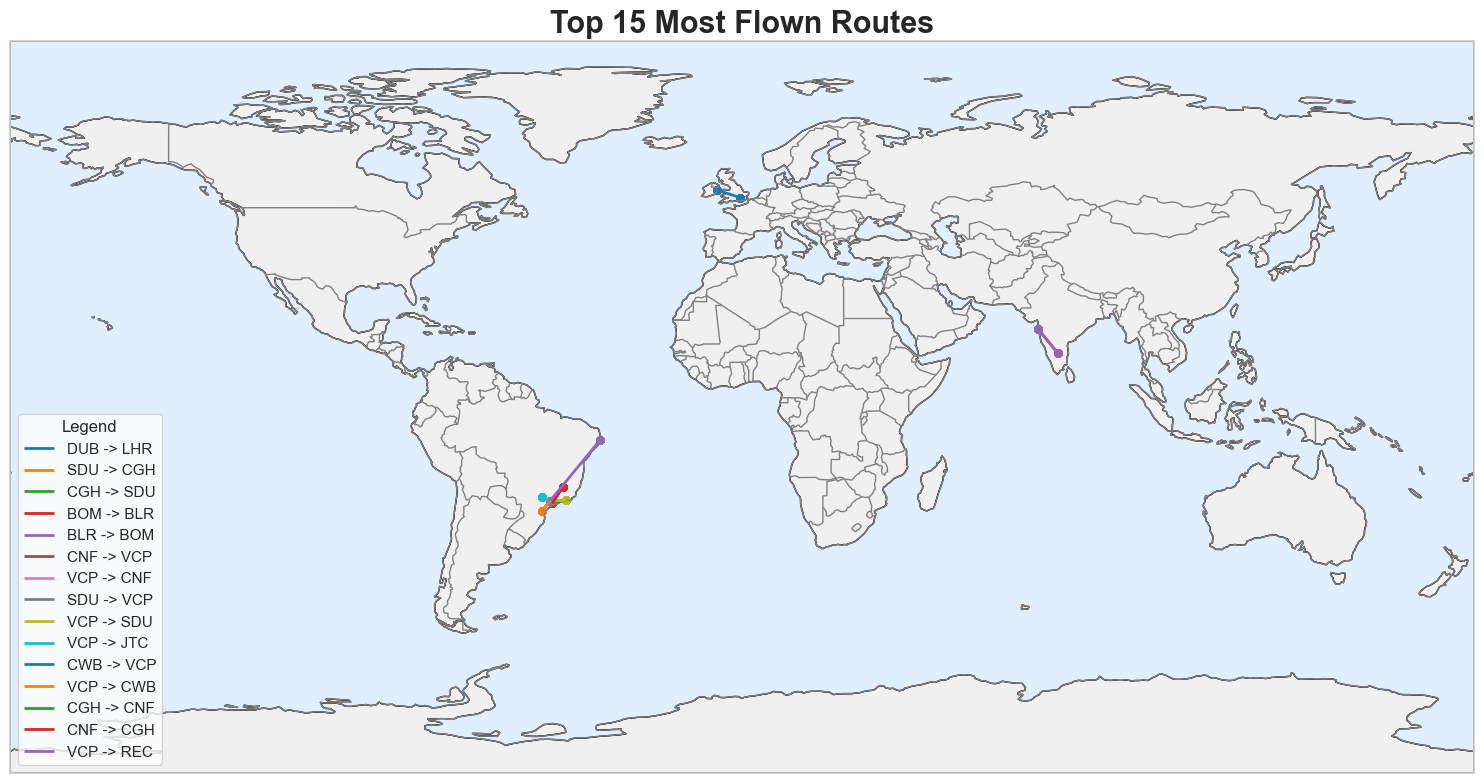

In [34]:
# count the number of flights for each route
data['route'] = data['departure_airport'] + ' -> ' + data['arrival_airport']
route_counts = data.groupby('route').flight_id.nunique().reset_index()
route_counts.columns = ['route', 'count']

# sort and select the top 15 routes
top_routes = route_counts.sort_values(by='count', ascending=False).head(15)

# merge top routes with original data to get coordinates
top_routes_data = data[data['route'].isin(top_routes['route'])]

# create GeoDataFrame for the routes
departure_gdf = gpd.GeoDataFrame(top_routes_data, geometry=gpd.points_from_xy(top_routes_data.departure_lon, top_routes_data.departure_lat))
arrival_gdf = gpd.GeoDataFrame(top_routes_data, geometry=gpd.points_from_xy(top_routes_data.arrival_lon, top_routes_data.arrival_lat))

# create LineString geometries for each route
route_lines = []
for route in top_routes['route']:
    route_data = top_routes_data[top_routes_data['route'] == route]
    departure_coords = route_data[['departure_lon', 'departure_lat']].values[0]
    arrival_coords = route_data[['arrival_lon', 'arrival_lat']].values[0]
    line = LineString([departure_coords, arrival_coords])
    route_lines.append({'route': route, 'geometry': line})

routes_lines_gdf = gpd.GeoDataFrame(route_lines)

# map
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()

# background and physical features
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='#f0f0f0')  
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='#E1EEFB') 
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='gray')

# define a color map for the routes
colors = list(mcolors.TABLEAU_COLORS.values())

# plot the routes and points with different colors
for i, route in enumerate(routes_lines_gdf.itertuples()):
    color = colors[i % len(colors)]
    routes_lines_gdf.iloc[[i]].plot(ax=ax, edgecolor=color, linewidth=2, label=route.route)
    departure_gdf[departure_gdf['route'] == route.route].plot(ax=ax, color=color, markersize=25)
    arrival_gdf[arrival_gdf['route'] == route.route].plot(ax=ax, color=color, markersize=25)

# the map extent for a suitable region (e.g., global view)
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

# title and description
plt.title('Top 15 Most Flown Routes', fontsize=22, fontweight='bold')
"""plt.figtext(0.5, 0.01, 'This map shows the top 15 most flown routes.\n'
                       'The routes are indicated by lines connecting the departure and arrival airports.', 
            ha='center', fontsize=12)"""

# legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='lower left', title='Legend')

# adjust layout for a clean and modern look
plt.tight_layout()

plt.savefig('./graphics/top_15_routes_map.svg', format='svg')
plt.show()



/var/folders/vm/vj250x0s5q9bj_4nnx_z8mcc0000gn/T/ipykernel_78572/3241771416.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['route'] = filtered_data['departure_airport'] + ' -> ' + filtered_data['arrival_airport']


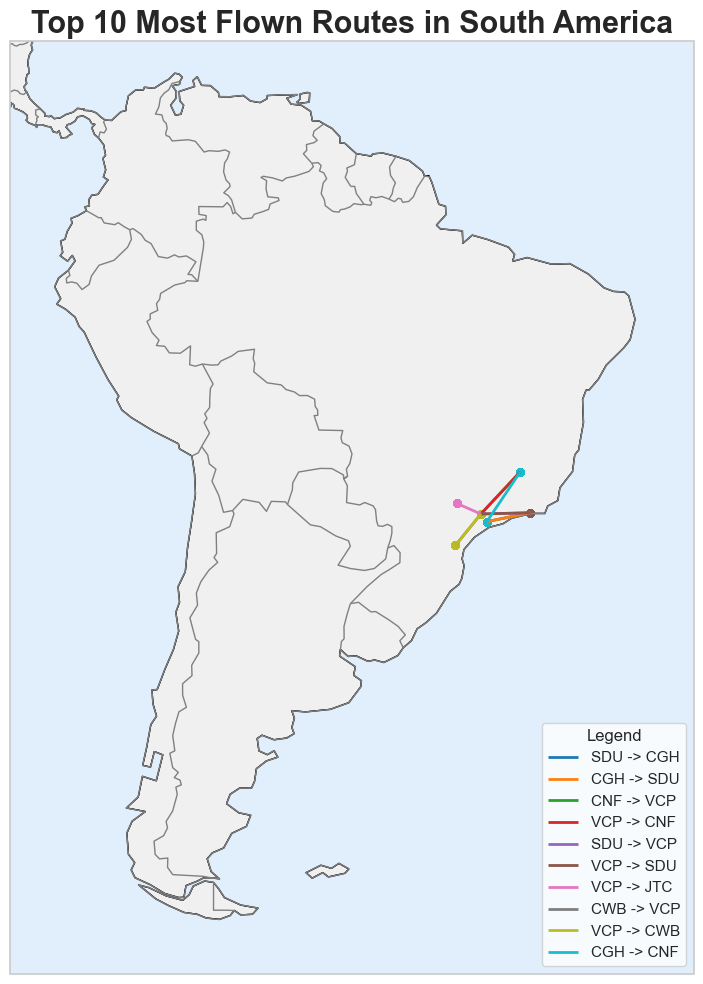

In [31]:
# filter data for airline_code 'ZY'
filtered_data = data[data['airline_code'] == 'ZY']

# count the number of flights for each route
filtered_data['route'] = filtered_data['departure_airport'] + ' -> ' + filtered_data['arrival_airport']
route_counts = filtered_data.groupby('route').flight_id.nunique().reset_index()
route_counts.columns = ['route', 'count']

# sort and select the top 10 routes
top_routes = route_counts.sort_values(by='count', ascending=False).head(10)

# merge top routes with original data to get coordinates
top_routes_data = filtered_data[filtered_data['route'].isin(top_routes['route'])]

# create GeoDataFrame for the routes
departure_gdf = gpd.GeoDataFrame(top_routes_data, geometry=gpd.points_from_xy(top_routes_data.departure_lon, top_routes_data.departure_lat))
arrival_gdf = gpd.GeoDataFrame(top_routes_data, geometry=gpd.points_from_xy(top_routes_data.arrival_lon, top_routes_data.arrival_lat))

# create LineString geometries for each route
route_lines = []
for route in top_routes['route']:
    route_data = top_routes_data[top_routes_data['route'] == route]
    departure_coords = route_data[['departure_lon', 'departure_lat']].values[0]
    arrival_coords = route_data[['arrival_lon', 'arrival_lat']].values[0]
    line = LineString([departure_coords, arrival_coords])
    route_lines.append({'route': route, 'geometry': line})

routes_lines_gdf = gpd.GeoDataFrame(route_lines)

# create the map
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()

# add background and physical features
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='#f0f0f0')  
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='#E1EEFB')  
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='gray')

# define a color map for the routes
colors = list(mcolors.TABLEAU_COLORS.values())

# plot the routes and points with different colors
for i, route in enumerate(routes_lines_gdf.itertuples()):
    color = colors[i % len(colors)]
    routes_lines_gdf.iloc[[i]].plot(ax=ax, edgecolor=color, linewidth=2, label=route.route)
    departure_gdf[departure_gdf['route'] == route.route].plot(ax=ax, color=color, markersize=25)
    arrival_gdf[arrival_gdf['route'] == route.route].plot(ax=ax, color=color, markersize=25)

# set the map extent for South America
ax.set_extent([-85, -30, -60, 15], crs=ccrs.PlateCarree())

# title and description
plt.title('Top 10 Most Flown Routes in South America', fontsize=22, fontweight='bold')

# legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='lower right', title='Legend')

# adjust layout for a clean and modern look
plt.tight_layout()
plt.savefig('./graphics/top_10_routes_southAmerica_zy.svg', format='svg')
plt.show()

/var/folders/vm/vj250x0s5q9bj_4nnx_z8mcc0000gn/T/ipykernel_78572/3615904246.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['route'] = filtered_data['departure_airport'] + ' -> ' + filtered_data['arrival_airport']


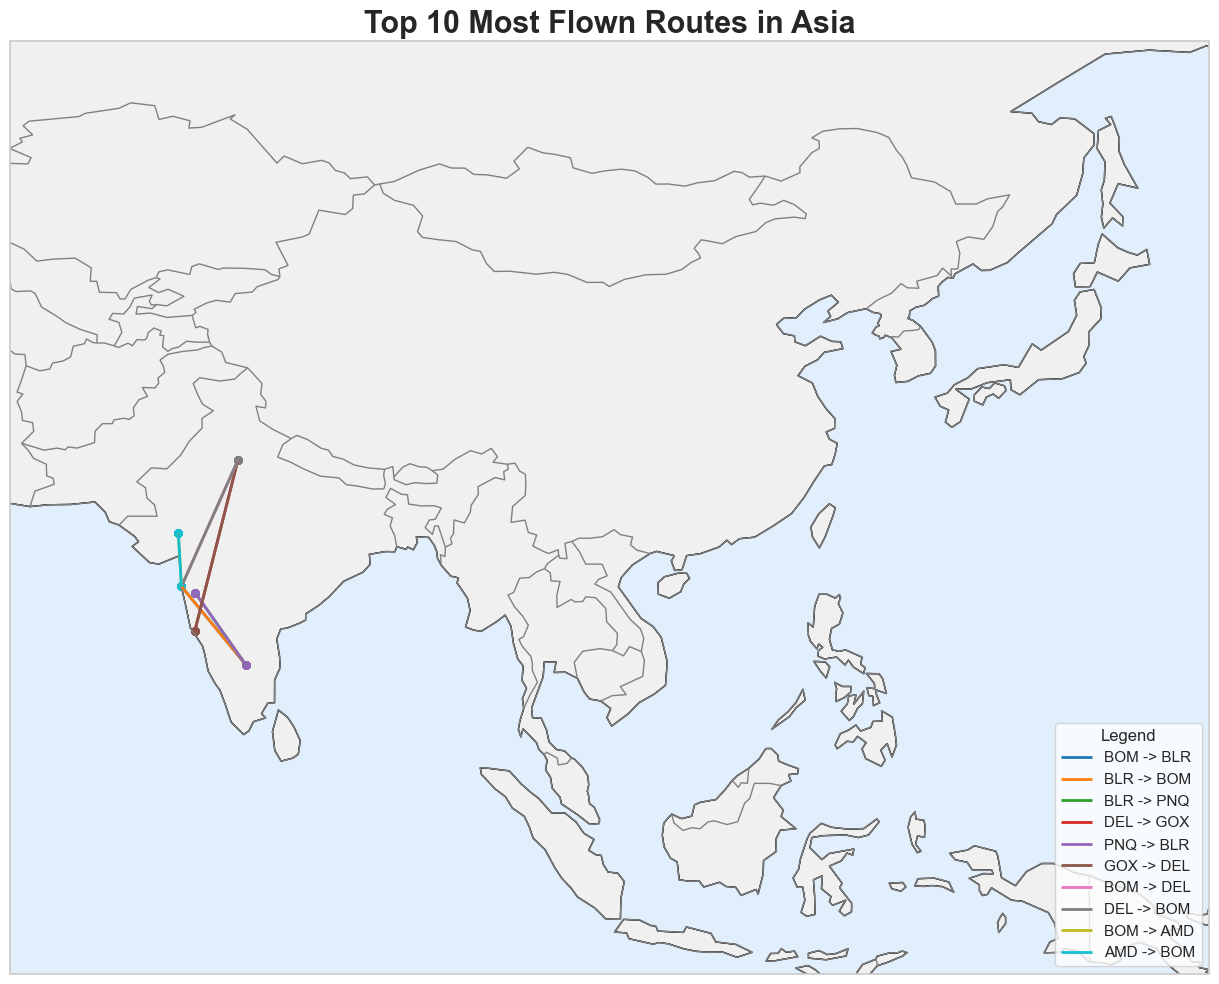

In [32]:
# filter data for airline_code 'AB'
filtered_data = data[data['airline_code'] == 'AB']

# count the number of flights for each route
filtered_data['route'] = filtered_data['departure_airport'] + ' -> ' + filtered_data['arrival_airport']
route_counts = filtered_data.groupby('route').flight_id.nunique().reset_index()
route_counts.columns = ['route', 'count']

# sort and select the top 10 routes
top_routes = route_counts.sort_values(by='count', ascending=False).head(10)

# merge top routes with original data to get coordinates
top_routes_data = filtered_data[filtered_data['route'].isin(top_routes['route'])]

# GeoDataFrame for the routes
departure_gdf = gpd.GeoDataFrame(top_routes_data, geometry=gpd.points_from_xy(top_routes_data.departure_lon, top_routes_data.departure_lat))
arrival_gdf = gpd.GeoDataFrame(top_routes_data, geometry=gpd.points_from_xy(top_routes_data.arrival_lon, top_routes_data.arrival_lat))

# LineString geometries for each route
route_lines = []
for route in top_routes['route']:
    route_data = top_routes_data[top_routes_data['route'] == route]
    departure_coords = route_data[['departure_lon', 'departure_lat']].values[0]
    arrival_coords = route_data[['arrival_lon', 'arrival_lat']].values[0]
    line = LineString([departure_coords, arrival_coords])
    route_lines.append({'route': route, 'geometry': line})

routes_lines_gdf = gpd.GeoDataFrame(route_lines)

# map
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()

# background and physical features
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='#f0f0f0')  
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='#E1EEFB')  
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='gray')

# define a color map for the routes
colors = list(mcolors.TABLEAU_COLORS.values())

# plot the routes and points with different colors
for i, route in enumerate(routes_lines_gdf.itertuples()):
    color = colors[i % len(colors)]
    routes_lines_gdf.iloc[[i]].plot(ax=ax, edgecolor=color, linewidth=2, label=route.route)
    departure_gdf[departure_gdf['route'] == route.route].plot(ax=ax, color=color, markersize=25)
    arrival_gdf[arrival_gdf['route'] == route.route].plot(ax=ax, color=color, markersize=25)

# set the map extent for Asia
ax.set_extent([60, 150, -10, 60], crs=ccrs.PlateCarree())

# title and description
plt.title('Top 10 Most Flown Routes in Asia', fontsize=22, fontweight='bold')

# legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='lower right', title='Legend')

# adjust layout for a clean and modern look
plt.tight_layout()
plt.savefig('./graphics/top_10_routes_asia_ab.svg', format='svg')
plt.show()

/var/folders/vm/vj250x0s5q9bj_4nnx_z8mcc0000gn/T/ipykernel_78572/2609135222.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['route'] = filtered_data['departure_airport'] + ' -> ' + filtered_data['arrival_airport']


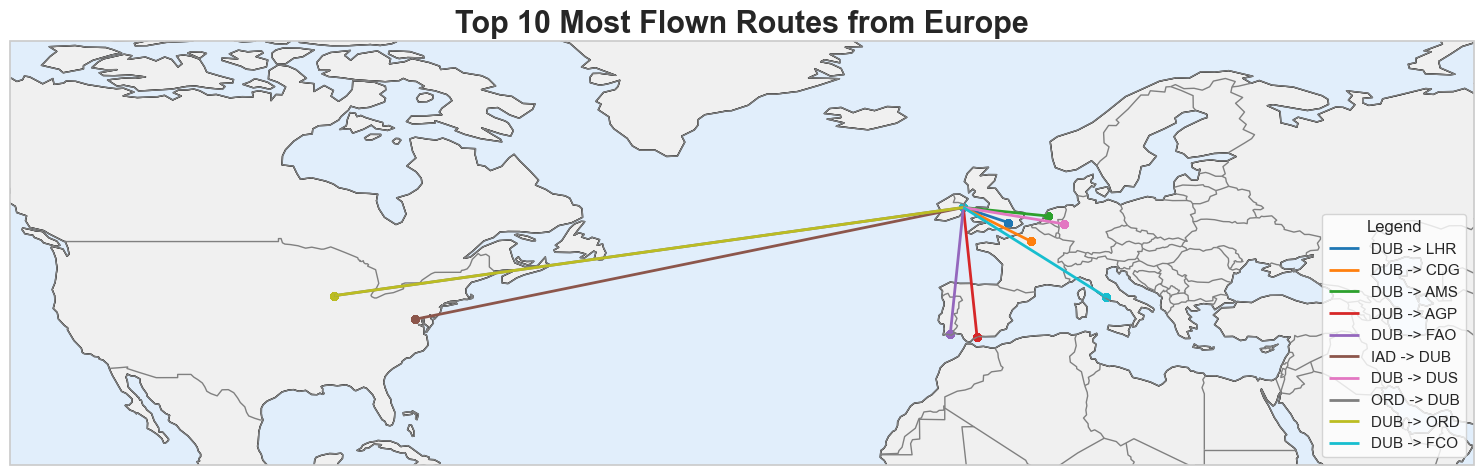

In [33]:
# filter data for airline_code 'MN'
filtered_data = data[data['airline_code'] == 'MN']

# count the number of flights for each route
filtered_data['route'] = filtered_data['departure_airport'] + ' -> ' + filtered_data['arrival_airport']
route_counts = filtered_data.groupby('route').flight_id.nunique().reset_index()
route_counts.columns = ['route', 'count']

# sort and select the top 10 routes
top_routes = route_counts.sort_values(by='count', ascending=False).head(10)

# merge top routes with original data to get coordinates
top_routes_data = filtered_data[filtered_data['route'].isin(top_routes['route'])]

# create GeoDataFrame for the routes
departure_gdf = gpd.GeoDataFrame(top_routes_data, geometry=gpd.points_from_xy(top_routes_data.departure_lon, top_routes_data.departure_lat))
arrival_gdf = gpd.GeoDataFrame(top_routes_data, geometry=gpd.points_from_xy(top_routes_data.arrival_lon, top_routes_data.arrival_lat))

# LineString geometries for each route
route_lines = []
for route in top_routes['route']:
    route_data = top_routes_data[top_routes_data['route'] == route]
    departure_coords = route_data[['departure_lon', 'departure_lat']].values[0]
    arrival_coords = route_data[['arrival_lon', 'arrival_lat']].values[0]
    line = LineString([departure_coords, arrival_coords])
    route_lines.append({'route': route, 'geometry': line})

routes_lines_gdf = gpd.GeoDataFrame(route_lines)

# map
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()

# background and physical features
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='#f0f0f0')  
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='#E1EEFB')  
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='gray')

# a color map for the routes
colors = list(mcolors.TABLEAU_COLORS.values())

# plot the routes and points with different colors
for i, route in enumerate(routes_lines_gdf.itertuples()):
    color = colors[i % len(colors)]
    routes_lines_gdf.iloc[[i]].plot(ax=ax, edgecolor=color, linewidth=2, label=route.route)
    departure_gdf[departure_gdf['route'] == route.route].plot(ax=ax, color=color, markersize=25)
    arrival_gdf[arrival_gdf['route'] == route.route].plot(ax=ax, color=color, markersize=25)

# set the map extent to cover both Europe and parts of America
ax.set_extent([-130, 60, 20, 75], crs=ccrs.PlateCarree())

# title and description
plt.title('Top 10 Most Flown Routes from Europe', fontsize=22, fontweight='bold')

# legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='lower right', title='Legend')

# adjust layout 
plt.tight_layout()
plt.savefig('./graphics/top_10_routes_europe_mn_expanded.svg', format='svg')

plt.show()


In [ ]:
top_routes